# Convolution using NumPy

In [1]:
import numpy as np

# Define a simple 5x5 image (grayscale)
image = np.array([
    [1, 2, 3, 0, 1],
    [4, 5, 6, 1, 0],
    [7, 8, 9, 0, 1],
    [0, 1, 2, 4, 5],
    [1, 2, 3, 4, 5]
])

# Define a 3x3 filter (also called a kernel)
filter = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])

# Perform convolution operation
filter_size = filter.shape[0]
result = np.zeros((image.shape[0] - filter_size + 1, image.shape[1] - filter_size + 1))

for i in range(result.shape[0]):
    for j in range(result.shape[1]):
        result[i, j] = np.sum(image[i:i+filter_size, j:j+filter_size] * filter)

print("Original Image:\n", image)
print("Convolution Result:\n", result)


Original Image:
 [[1 2 3 0 1]
 [4 5 6 1 0]
 [7 8 9 0 1]
 [0 1 2 4 5]
 [1 2 3 4 5]]
Convolution Result:
 [[-6. 14. 16.]
 [-6.  9. 11.]
 [-6.  3.  3.]]


# Max Pooling using NumPy

In [2]:
# Define a simple 4x4 feature map
feature_map = np.array([
    [1, 3, 2, 4],
    [5, 6, 1, 2],
    [7, 8, 3, 1],
    [2, 3, 4, 5]
])

# Define pooling size
pool_size = 2
result = np.zeros((feature_map.shape[0] // pool_size, feature_map.shape[1] // pool_size))

for i in range(result.shape[0]):
    for j in range(result.shape[1]):
        result[i, j] = np.max(feature_map[i*pool_size:(i+1)*pool_size, j*pool_size:(j+1)*pool_size])

print("Original Feature Map:\n", feature_map)
print("Max Pooling Result:\n", result)

Original Feature Map:
 [[1 3 2 4]
 [5 6 1 2]
 [7 8 3 1]
 [2 3 4 5]]
Max Pooling Result:
 [[6. 4.]
 [8. 5.]]


# Hands-on

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize the images to the range [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# One-hot encode the labels
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

print(f"Training data shape: {train_images.shape}")
print(f"Testing data shape: {test_images.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    # First Convolutional Layer
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),

    # Second Convolutional Layer
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Flatten the results to feed into a fully connected layer
    Flatten(),

    # Fully Connected Layer
    Dense(64, activation='relu'),
    Dropout(0.5),

    # Output Layer with softmax activation for multi-class classification
    Dense(10, activation='softmax')
])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         147,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 167,562 (654.54 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.3015 - loss: 1.8788 - val_accuracy: 0.5302 - val_loss: 1.3143
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4828 - loss: 1.4347 - val_accuracy: 0.5922 - val_loss: 1.1787
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.5344 - loss: 1.2969 - val_accuracy: 0.6361 - val_loss: 1.0624
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5703 - loss: 1.2081 - val_accuracy: 0.6212 - val_loss: 1.0921
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5918 - loss: 1.1518 - val_accuracy: 0.6542 - val_loss: 0.9942
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6184 - loss: 1.0801 - val_accuracy: 0.6615 - val_loss: 0.9724
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6240 - loss: 1.0517 - val_accuracy: 0.6638 - val_loss: 0.9713
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6377 - loss: 1.0215 -

In [6]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6701 - loss: 0.9343
Test accuracy: 0.6723


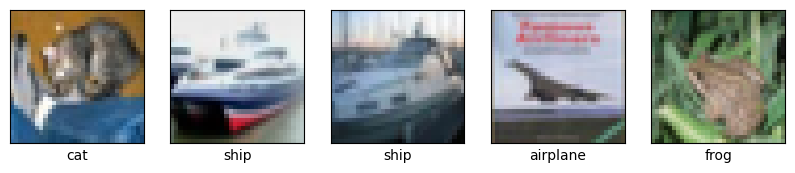

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step
Image 1:
True Label: cat
Predicted Label: dog

Image 2:
True Label: ship
Predicted Label: automobile

Image 3:
True Label: ship
Predicted Label: truck

Image 4:
True Label: airplane
Predicted Label: airplane

Image 5:
True Label: frog
Predicted Label: frog



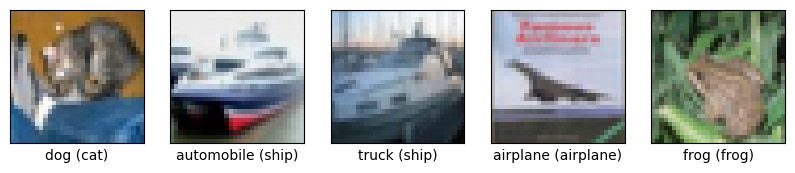

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Select the first 5 images from the test set
test_images_subset = test_images[:5]
test_labels_subset = test_labels[:5]

# Display the selected images
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 2))
for i in range(len(test_images_subset)):
    plt.subplot(1, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images_subset[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[np.argmax(test_labels_subset[i])])
plt.show()

# Generate predictions for the selected images
predictions = model.predict(test_images_subset)

# Display the predictions
for i in range(len(test_images_subset)):
    predicted_label = np.argmax(predictions[i])
    true_label = np.argmax(test_labels_subset[i])
    print(f"Image {i+1}:")
    print(f"True Label: {class_names[true_label]}")
    print(f"Predicted Label: {class_names[predicted_label]}")
    print()

# Visualize Predictions with Labels
plt.figure(figsize=(10, 2))
for i in range(len(test_images_subset)):
    plt.subplot(1, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images_subset[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = np.argmax(test_labels_subset[i])
    plt.xlabel(f"{class_names[predicted_label]} ({class_names[true_label]})")
plt.show()